## Wavelet Practice: Spy Sounds

A door is encoded with a number pad (0-9). We can't see the door, but through nefariouis means we have a recording of someone opening it. Quick, we need to decode this [mystery signal](data/mystery_signal.wav)! The door code is encoded in this mystery_signal.wav file but we need to know what music notes and their order to open it

We know that the door code is set up as:
- A note: 0
- B note: 1
- C note: 2
- D note: 3
- E note: 4
- F note: 5

In [ ]:
import IPython
print("Give it a listen!")
IPython.display.Audio("data/mystery_signal.wav")

In [ ]:
# note frequency in hz
a_freq = 440
print(f"A note {a_freq} hz")
b_freq = 494
print(f"B note {b_freq} hz")
c_freq = 261
print(f"C note {c_freq} hz")
d_freq = 293
print(f"D note {d_freq} hz")
e_freq = 350
print(f"E note {e_freq} hz")
f_freq = 391
print(f"F note {f_freq} hz")

First, let's us extract and review the raw audio .wav file

In [ ]:
import ipywidgets
import pandas as pd
import numpy as np

In [ ]:
# Extract audio .wav file
import scipy.io.wavfile
sampleRate, audioBuffer = scipy.io.wavfile.read("data/mystery_signal.wav")

audioBuffer = np.float64(audioBuffer) # translate to 64 to avoid overflow error when normalizing

# Amplitude determines the volume of thes ound
# Frequency determines the chord

audioBuffer = (audioBuffer - np.min(audioBuffer)) / (np.max(audioBuffer) - np.min(audioBuffer)) # normalize data
duration = len(audioBuffer) / sampleRate
time = np.arange(0, duration, 1/sampleRate) 

print(f"Sample Rate: {sampleRate}")
print(f"duration = {duration} seconds (sample rate and audioBuffer = {len(audioBuffer)} / {sampleRate}")
print(f"len of audio file = {len(audioBuffer)}")
print(f"Total Length in time = {len(time)}")

In [ ]:
# skip 0 time step
signal_df = pd.DataFrame({'time (seconds)': time[1:], 'amplitude': audioBuffer[1:]})
signal_df.head()

In [ ]:
# Plot .wav file
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

fig = px.line(data_frame=signal_df, x="time (seconds)", y="amplitude",
              title="Mystery Signal")
fig.show()

In [ ]:
import pywt # PyWavelets
import math

In [ ]:
wavelet_mother = "gaus1" # morlet
#dt =  0.01  # 100 Hz sampling 
dt = 1/sampleRate # timestep difference
print(dt)
print(f"{int(1/ dt)} hz")
print(sampleRate)

In [ ]:
# How to determine width? impacts the y-axis
# WIDTH: IS THE Y-AXIS

In [ ]:
# scale determinse how squished or stretched a wavelet is
dj = 0.025
s_zero = dt*1000 # pywavelets requires smallest scale to be above a certain number, *1000 otherwise too small
jtot = math.log2((len(audioBuffer)*dt)/s_zero)
scales = np.arange(s_zero, jtot, dj) # scales of morlet wavlet
print(f"scales (len = {len(scales)} from {s_zero} to {jtot} every {dt} steps) = \n{scales}")
#frequencies = pywt.scale2frequency(wavelet_mother, scales) / dt#print(f"length of frequences = {len(frequencies)}")
#print(frequencies)
#print(min(frequencies))
#print(max(frequencies))
# frequences associated with the scales
# Create a filter to select frequencies between 80Hz and 400KHz
#upper = ([x for x in range(len(widths)) if frequencies[x] > 1000])[-1]
#lower = ([x for x in range(len(widths)) if frequencies[x] < 800])[0]
#widths = widths[upper:lower] # Select scales in this frequency range
#print(f"\nfiltered widths = \n{widths}")

size (199, 60000) with 199 scales and 60000 time steps
x-axis be default is: 60000
y-axis be default is: 199
2.9955420163334643
-2.9955427691819048


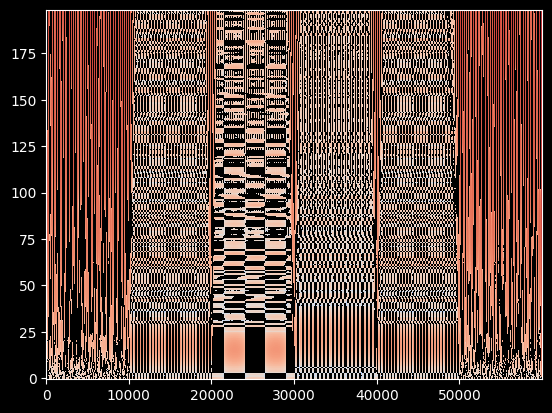

In [12]:
wavelet_coeffs, freqs = pywt.cwt(audioBuffer, scales, wavelet = wavelet_mother)#, sampling_period= dt)
# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
# results in cwt with many wavelet coeffs, which are a function of scale and position/time
# coefs = CWT coefficients (np.array)
# freqs = Frequencies corresponding to scales (np.array)
print(f"x-axis be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis be default is: {wavelet_coeffs.shape[0]}")
#print(pd.DataFrame(wavelet_coeffs).head(2))
#print(freqs)
import matplotlib.pyplot as plt
dj = 0.025
s_zero = dt*1000 # pywavelets requires smallest scale to be above a certain number, *1000 otherwise too small
jtot = math.log2((len(audioBuffer)*dt)/s_zero)
scales = np.arange(s_zero, jtot, dj) # scales of morlet wavlet
# Plot scalogram
plt.style.use('dark_background')
#data = abs(wavelet_coeffs) # compare the magntiude
data = wavelet_coeffs
print(np.amax(data))
print(np.amin(data))
#plt.matshow(data, aspect="auto")
plt.imshow(data, 
           #extent=[0, 233, 60000, 1], 
           norm="log",
           #interpolation="bilinear", 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(freqs)
plt.title("Frequencies of Coeffs")
plt.xlabel("Scales Sensitive")
plt.show()

In [ ]:
# X-axis: time
# Y-axis: scale
# scale corresponds to signal periodicity that the transform is sensitive to

'''
plt.xlabel("Time Steps")
plt.ylabel("Scales Sensitive")
data = np.square(np.absolute(wavelet_coeffs))
print(np.amin(data))
print(np.amax(data))
data = np.log2(data)
#data[data<.001]=np.nan # filter out small numbers
#data = np.where(data!= 0, np.log2(data), np.nan)
#print(np.min(data))
plt.imshow(data, cmap="RdBu_r", aspect='auto')
#plt.imshow(data, cmap="RdBu_r", aspect='auto')
#plt.imshow(wavelet_coeffs, cmap="coolwarm")
'''
# Plot scalogram
plt.style.use('dark_background')
#data = abs(wavelet_coeffs) # compare the magntiude
data = wavelet_coeffs
print(np.amax(data))
print(np.amin(data))
#plt.matshow(data, aspect="auto")
plt.imshow(data, 
           #extent=[0, 233, 60000, 1], 
           norm="log",
           #interpolation="bilinear", 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Cone of Influence: COI
# Shows regions of scalogram that are potentionally being impacted by the edge-effect where streched wavelets extend beyond the edge of an interval
# matlab breakdown: https://www.mathworks.com/help/wavelet/ug/boundary-effects-and-the-cone-of-influence.html
import pywt
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 200)
signal = abs(np.cos(2 * np.pi * 7 * t))
scales = np.arange(0, 31)
coef, freqs = pywt.cwt(signal, scales, 'gaus1')


In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plot
x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freq = pywt.cwt(y, np.arange(1, 222), 'morl')
plt.matshow(coef)
plt.show()

size (199, 60000) with 199 scales and 60000 time steps
x-axis be default is: 60000
y-axis be default is: 199
17.582795417935397
-13.879135985585634


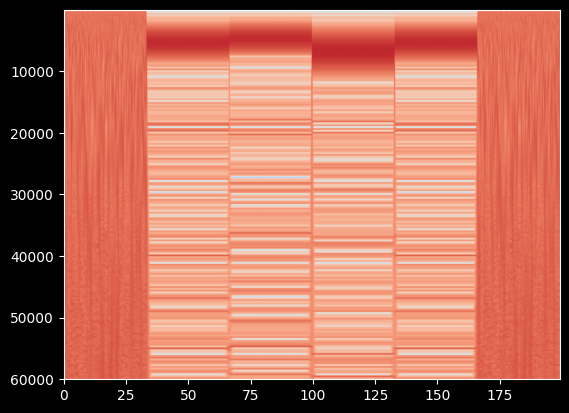

In [11]:
import scipy.io.wavfile
import numpy as np
import pywt
import math
sample_freq, signal = scipy.io.wavfile.read("data/mystery_signal.wav")

# Amplitude determines the volume of thes ound
# Frequency determines the chord

wavelet_mother = "morl" # morlet
scales = np.arange(1, 200)
wavelet_coeffs, freqs = pywt.cwt(signal, scales, wavelet = wavelet_mother)
# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis be default is: {wavelet_coeffs.shape[0]}")
#print(pd.DataFrame(wavelet_coeffs).head(2))
#print(freqs)
import matplotlib.pyplot as plt

# Plot scalogram
data = None
plt.style.use('dark_background')
data = np.log2(abs(wavelet_coeffs)) # compare the magntiude
print(np.amax(data))
print(np.amin(data))
plt.imshow(data, 
           extent=[0, wavelet_coeffs.shape[0], wavelet_coeffs.shape[1], 1], 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.show()